✅ Loaded 1,028,136 rows


,Date/Time,Lat,Lon,Base,Hour,DayOfWeek,Date
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,0,Monday,2014-09-01
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,0,Monday,2014-09-01
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,0,Monday,2014-09-01
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,0,Monday,2014-09-01
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,0,Monday,2014-09-01


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028136 entries, 0 to 1028135
Data columns (total 7 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   Date/Time  1028136 non-null  datetime64[ns]
 1   Lat        1028136 non-null  float64       
 2   Lon        1028136 non-null  float64       
 3   Base       1028136 non-null  object        
 4   Hour       1028136 non-null  int32         
 5   DayOfWeek  1028136 non-null  object        
 6   Date       1028136 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(1), object(3)
memory usage: 51.0+ MB


None

,Date/Time,Lat,Lon,Hour
count,1028136,1.028136e+06,1.028136e+06,1.028136e+06
mean,2014-09-16 03:52:26.810558464,4.073922e+01,-7.397182e+01,1.409235e+01
min,2014-09-01 00:00:00,3.998970e+01,-7.477360e+01,0.000000e+00
25%,2014-09-08 19:27:00,4.072040e+01,-7.399620e+01,1.000000e+01
50%,2014-09-16 07:03:00,4.074180e+01,-7.398310e+01,1.500000e+01
75%,2014-09-23 13:44:00,4.076120e+01,-7.396280e+01,1.900000e+01
max,2014-09-30 22:59:00,4.134760e+01,-7.271630e+01,2.300000e+01
std,NaN,4.082861e-02,5.831413e-02,5.971244e+00


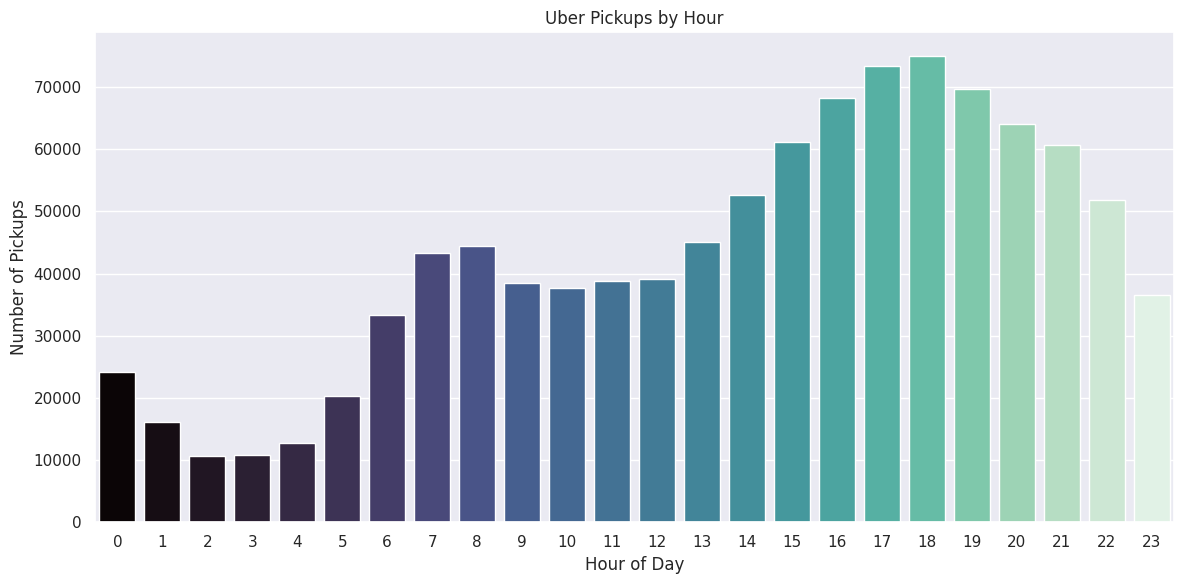

/tmp/ipykernel_1840745/2438344440.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


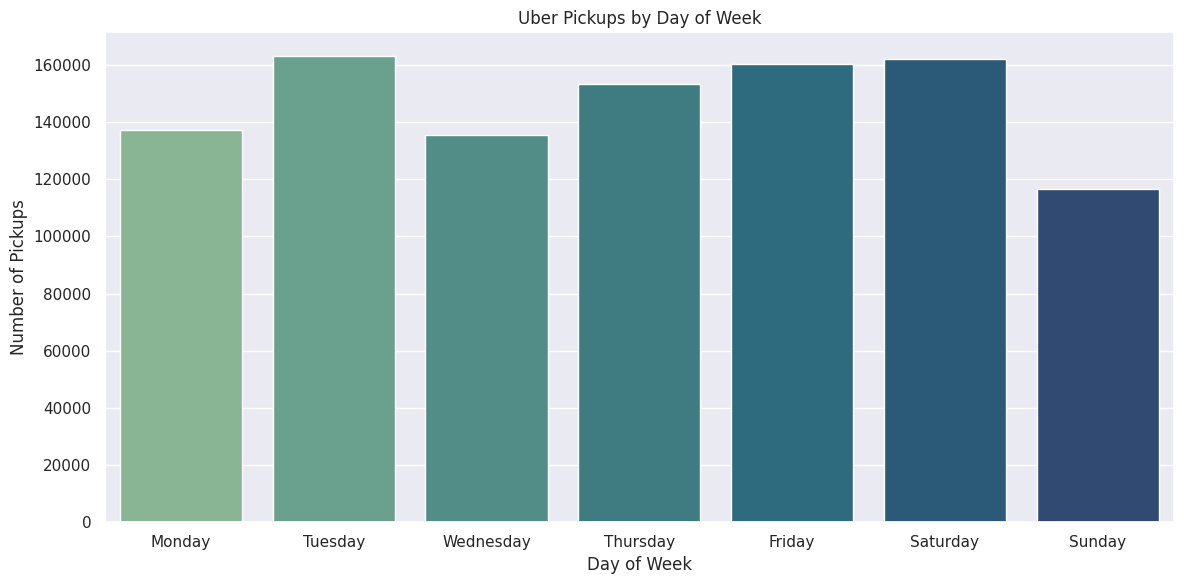

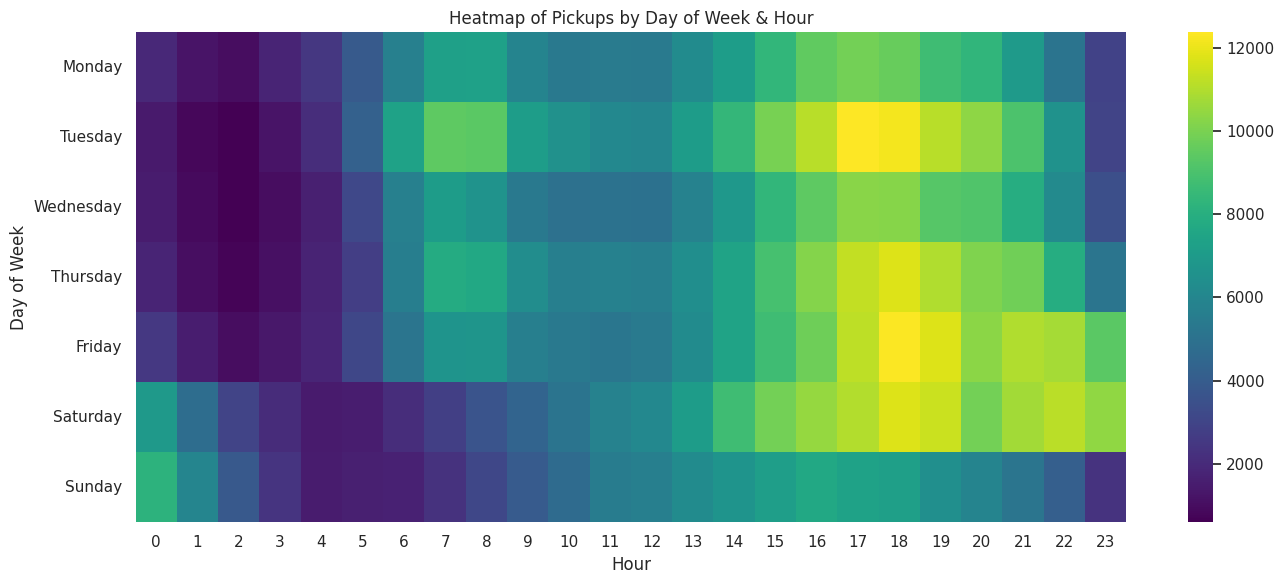

✅ Map is ready — it will render inline in Jupyter below


In [1]:
# 🚕 NYC Uber Pickups – September 2014
# This notebook explores hourly, daily, and geographic patterns in Uber pickups using a real dataset from NYC in Sep 2014.

# 📦 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import os

sns.set(style='darkgrid')

# 📂 Load Data
df = pd.read_csv("../data/raw/uber-raw-data-sep14.csv")
print(f"✅ Loaded {len(df):,} rows")

# 🧼 Preprocessing
df['Date/Time'] = pd.to_datetime(df['Date/Time'], errors='coerce')
df['Hour'] = df['Date/Time'].dt.hour
df['DayOfWeek'] = df['Date/Time'].dt.day_name()
df['Date'] = df['Date/Time'].dt.date
df.dropna(subset=['Date/Time'], inplace=True)

# 🎨 Create output folder for images
os.makedirs("../notebooks/plots", exist_ok=True)

# 👀 Preview
display(df.head())
display(df.info())
display(df.describe())

# 📊 Plot: Pickups by Hour
plt.figure(figsize=(12, 6))
# ✅ Fix FutureWarning by assigning hue='Hour'
sns.countplot(x='Hour', data=df, hue='Hour', palette='mako', legend=False)
plt.title('Uber Pickups by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.tight_layout()
plt.savefig("../notebooks/plots/pickups_by_hour.png")
plt.show()

# 📊 Plot: Pickups by Day of Week
plt.figure(figsize=(12, 6))
sns.countplot(
    x='DayOfWeek',
    data=df,
    order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    palette='crest'
)
plt.title('Uber Pickups by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Pickups')
plt.tight_layout()
plt.savefig("../notebooks/plots/pickups_by_day.png")
plt.show()

# 🔥 Heatmap: Day of Week vs Hour
pivot = df.pivot_table(index='DayOfWeek', columns='Hour', values='Lat', aggfunc='count')
pivot = pivot.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(14, 6))
sns.heatmap(pivot, cmap='viridis')
plt.title('Heatmap of Pickups by Day of Week & Hour')
plt.xlabel('Hour')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.savefig("../notebooks/plots/pickup_heatmap.png")
plt.show()

# 🗺️ Optional: Folium map of 1000 random pickups
sample_df = df.sample(1000, random_state=42)

m = folium.Map(location=[40.75, -73.98], zoom_start=11)

for _, row in sample_df.iterrows():
    folium.CircleMarker(
        location=[row['Lat'], row['Lon']],
        radius=1,
        color='blue',
        fill=True,
        fill_opacity=0.3
    ).add_to(m)

print("✅ Map is ready — it will render inline in Jupyter below")
m


# 🚕 NYC Uber Pickups – September 2014

This project explores Uber pickups in NYC using a dataset from FiveThirtyEight.

## 📊 Highlights:
- Most pickups occur between 5–8PM
- Friday and Saturday are peak days
- Heatmaps reveal weekly + hourly patterns
- Bonus: Folium map of 1,000 pickup locations

## 📁 Outputs:
- [`analysis.ipynb`](notebooks/analysis.ipynb)
- ![Hourly Pickups](notebooks/plots/pickups_by_hour.png)
- ![Pickup Heatmap](notebooks/plots/pickup_heatmap.png)

## 📦 Environment:
Python 3.12, pandas, matplotlib, seaborn, folium  
(venv included for reproducibility)
